## 研究題目
### 資料庫
這次選的是 [
Tarvel Review Ratings Data Set](https://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings) 這一個資料集，裡面以每個使用者為一筆資料，包含每個使用者對google地圖上24種不同類型地點的評分數。

### 選擇題目
* 想知道與餐廳相關的評分數會受到哪些影響，換言之，是否能以某人在其他類型景點的評分數來預測他對於餐廳的喜好程度。
* 可以應用在google地圖中的推薦系統


## 前處理
### 讀入資料庫

In [1]:
import time
import numpy as np
import pandas as pd

EXECUTION_START_TIME = time.time()

df = pd.read_csv('google_review_ratings.csv')

/home/tingyu/.local/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# import
pd.options.mode.chained_assignment = None      # 解決會噴 warning 的狀況

import matplotlib.pyplot as plt
import seaborn as sns

### 填補缺失值
先檢查是否有缺失值

In [3]:
data = df[['Category 1','Category 2','Category 3','Category 4','Category 5', 'Category 6','Category 7','Category 8','Category 9','Category 10']]
print(data.describe())
data = df[['Category 11','Category 12','Category 13','Category 14','Category 15', 'Category 16','Category 17','Category 18','Category 19','Category 20']]
print(data.describe())
data = df[['Category 21','Category 22','Category 23','Category 24']]
print(data.describe())

        Category 1   Category 2   Category 3   Category 4   Category 5  \
count  5456.000000  5456.000000  5456.000000  5456.000000  5456.000000   
mean      1.455720     2.319707     2.489331     2.796886     2.958941   
std       0.827604     1.421438     1.247815     1.309159     1.339056   
min       0.000000     0.000000     0.000000     0.830000     1.120000   
25%       0.920000     1.360000     1.540000     1.730000     1.770000   
50%       1.340000     1.905000     2.060000     2.460000     2.670000   
75%       1.810000     2.682500     2.740000     4.092500     4.312500   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

       Category 6   Category 7   Category 8   Category 9  Category 10  
count  5456.00000  5456.000000  5456.000000  5456.000000  5456.000000  
mean      2.89349     3.351395     2.540795     3.126019     2.832729  
std       1.28240     1.413492     1.111391     1.356802     1.307665  
min       1.11000     1.120000     0.860000  

發現Category 11怪怪的，所以印出來檢查看看資料型別
Category 12, 24各有1個缺失值，因為缺失值很少，所以把缺失值的資料刪除。

In [4]:
print(type(df['Category 11'][1]))
df = df[df['Category 12'].notnull()]
df = df[df['Category 24'].notnull()]

<class 'str'>


檢查後發現Category 11變成字串型別，做型別轉換後再印出來檢查一次

In [5]:
df['Category 11'] = df['Category 11'].astype(float)
data = df[['Category 1','Category 2','Category 3','Category 4','Category 5', 'Category 6','Category 7','Category 8','Category 9','Category 10']]
print(data.describe())
data = df[['Category 11','Category 12','Category 13','Category 14','Category 15', 'Category 16','Category 17','Category 18','Category 19','Category 20']]
print(data.describe())
data = df[['Category 21','Category 22','Category 23','Category 24']]
print(data.describe())

        Category 1   Category 2   Category 3   Category 4   Category 5  \
count  5454.000000  5454.000000  5454.000000  5454.000000  5454.000000   
mean      1.455746     2.320048     2.489059     2.797103     2.958904   
std       0.827732     1.421576     1.247503     1.309188     1.338785   
min       0.000000     0.000000     0.000000     0.830000     1.120000   
25%       0.920000     1.360000     1.540000     1.730000     1.770000   
50%       1.340000     1.910000     2.060000     2.460000     2.670000   
75%       1.810000     2.687500     2.740000     4.097500     4.310000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

        Category 6   Category 7   Category 8   Category 9  Category 10  
count  5454.000000  5454.000000  5454.000000  5454.000000  5454.000000  
mean      2.893423     3.351476     2.541177     3.126542     2.832695  
std       1.282101     1.413291     1.111398     1.356774     1.307299  
min       1.110000     1.120000     0.860

### 剔除不合理的資料
* 由上面的輸出結果，可以觀察到有些類型有大量小於1的評分，然而google評分範圍是1~5，不可能有小於1的狀況。可能是有些地點過於冷門，使得有大量使用者沒有去到足夠的地點數，導致平均該種類地點的平均評分出現小於1甚至為0的狀況。這樣的欄位會影響準確度，因此不能列入計算。
* 經過上面的篩選，剩下2~14種類是可以使用的。接著將不合理的資料篩除，再印出來檢查。

In [6]:
df = df[['Category 3', 'Category 4', 'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10', 'Category 11', 'Category 12', 'Category 13', 'Category 14']]
df = df[df['Category 3']>=1]
df = df[df['Category 4']>=1]
df = df[df['Category 5']>=1]
df = df[df['Category 6']>=1]
df = df[df['Category 7']>=1]
df = df[df['Category 8']>=1]
df = df[df['Category 9']>=1]
df = df[df['Category 10']>=1]
df = df[df['Category 11']>=1]
df = df[df['Category 12']>=1]
df = df[df['Category 13']>=1]
df = df[df['Category 14']>=1]

print(df.describe())

        Category 3   Category 4   Category 5   Category 6   Category 7  \
count  3796.000000  3796.000000  3796.000000  3796.000000  3796.000000   
mean      2.518625     2.711646     2.831802     2.869744     3.478714   
std       1.265905     1.261096     1.311163     1.301055     1.423080   
min       1.000000     1.210000     1.250000     1.150000     1.140000   
25%       1.580000     1.720000     1.730000     1.790000     1.980000   
50%       2.030000     2.240000     2.640000     2.570000     3.240000   
75%       2.750000     3.280000     4.230000     4.290000     5.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

        Category 8  Category 9  Category 10  Category 11  Category 12  \
count  3796.000000  3796.00000  3796.000000  3796.000000  3796.000000   
mean      2.576375     3.22638     2.909987     2.698348     2.267442   
std       1.069929     1.29726     1.225735     1.297867     1.166797   
min       1.060000     1.06000     1.0100

### 計算相關係數

In [7]:
print(df.corr())

             Category 3  Category 4  Category 5  Category 6  Category 7  \
Category 3     1.000000    0.391033    0.380673    0.225514   -0.010717   
Category 4     0.391033    1.000000    0.696448    0.359285   -0.049506   
Category 5     0.380673    0.696448    1.000000    0.489736    0.038241   
Category 6     0.225514    0.359285    0.489736    1.000000    0.319792   
Category 7    -0.010717   -0.049506    0.038241    0.319792    1.000000   
Category 8    -0.128315   -0.087186   -0.026300    0.160344    0.329022   
Category 9    -0.164097   -0.176790   -0.203911    0.079985    0.394968   
Category 10   -0.124674   -0.118185   -0.111340   -0.054612    0.237286   
Category 11   -0.223584   -0.122053   -0.151352   -0.227904    0.079536   
Category 12   -0.285849   -0.181816   -0.183808   -0.264654   -0.071503   
Category 13   -0.199584   -0.114347   -0.101576   -0.219377   -0.058593   
Category 14   -0.177665   -0.319298   -0.253027   -0.185308    0.044494   

             Category 8 

### 資料視覺化
為了方便之後選取資料，觀察餐廳(category 9)的評分和其他欄位的關係

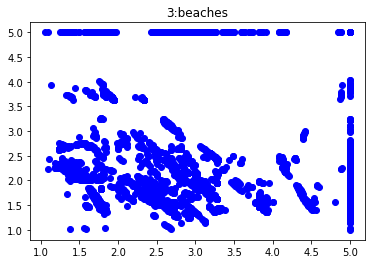

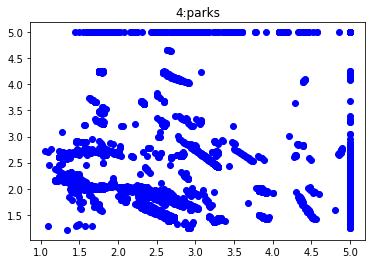

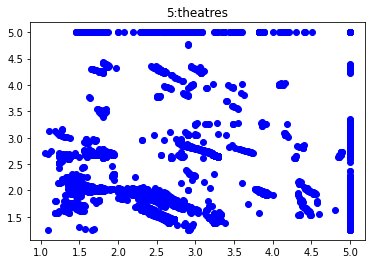

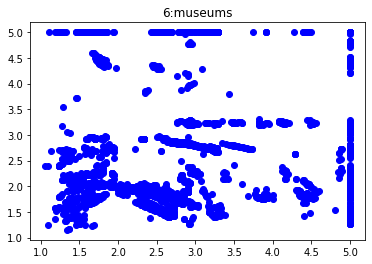

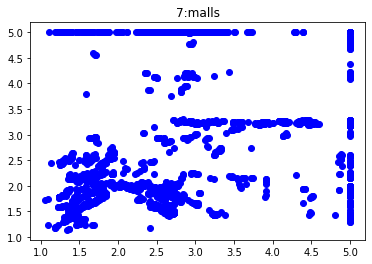

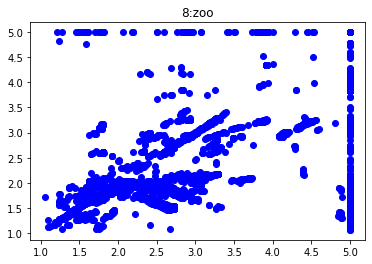

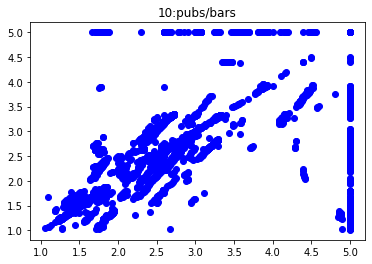

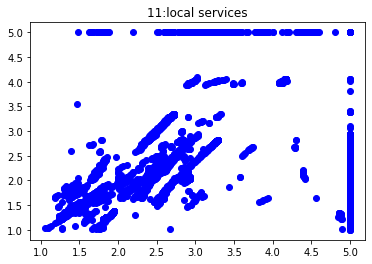

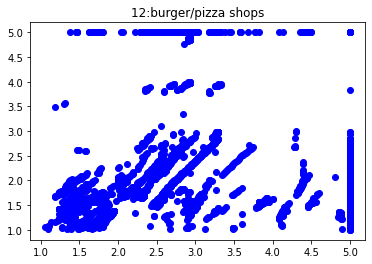

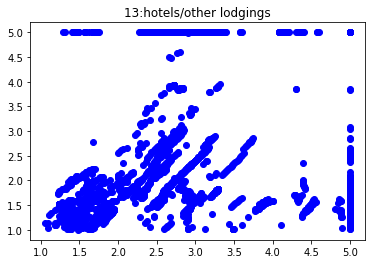

In [8]:
plt.scatter(df['Category 9'], df['Category 3'], color='b')
plt.title("3:beaches")
plt.show()

plt.scatter(df['Category 9'], df['Category 4'], color='b')
plt.title("4:parks")
plt.show()

plt.scatter(df['Category 9'], df['Category 5'], color='b')
plt.title("5:theatres")
plt.show()

plt.scatter(df['Category 9'], df['Category 6'], color='b')
plt.title("6:museums")
plt.show()

plt.scatter(df['Category 9'], df['Category 7'], color='b')
plt.title("7:malls")
plt.show()

plt.scatter(df['Category 9'], df['Category 8'], color='b')
plt.title("8:zoo")
plt.show()

plt.scatter(df['Category 9'], df['Category 10'], color='b')
plt.title("10:pubs/bars")
plt.show()

plt.scatter(df['Category 9'], df['Category 11'], color='b')
plt.title("11:local services")
plt.show()

plt.scatter(df['Category 9'], df['Category 12'], color='b')
plt.title("12:burger/pizza shops")
plt.show()

plt.scatter(df['Category 9'], df['Category 13'], color='b')
plt.title("13:hotels/other lodgings")
plt.show()

### 選取Feature
觀察上面的相關係數圖形，發現較與餐廳評分相關的有mail(category 7), zoo(category 8), pub/bar(category 10) 與 local serveices(category11)

In [9]:
train_x = df[['Category 7','Category 8','Category 10','Category 11']][0:3000]
train_y = df[['Category 9']][0:3000]
test_x = df[['Category 7','Category 8','Category 10','Category 11']][3001:]
test_y = df[['Category 9']][3001:]

train_x.index = range(len(train_x))
train_y.index = range(len(train_y))
test_x.index = range(len(test_x))
test_y.index = range(len(test_y))

## 模型訓練

匯入需要的套件

In [10]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

### 線性迴歸
用線性迴歸的方式預測結果，並用 R2 score 當作標準模型準確的標準。

In [11]:
model = LinearRegression()
model.fit(train_x,train_y['Category 9'])

predict = model.predict(test_x)
print(r2_score(test_y,predict))

0.45365650684497727


## 修正與改進
### 觀察與修正資料
可以發現結果不太好，為了檢查，印出線性迴歸模型與正確答案的圖形。

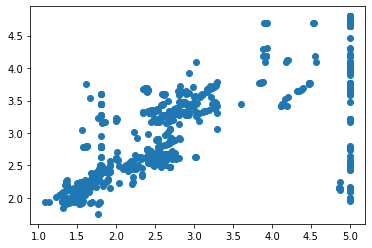

In [12]:
plt.scatter(test_y, predict)
plt.show()

繪圖出來的結果，可以發現最右邊有一群無論正解為5的離群值。為了了解原因，印出這些feature的分佈圖。

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae16c06b00>
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae16c06ac8>]]


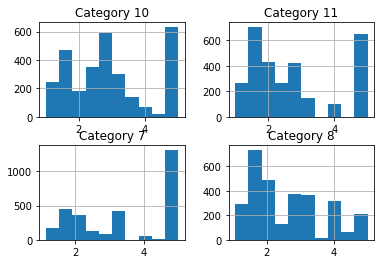

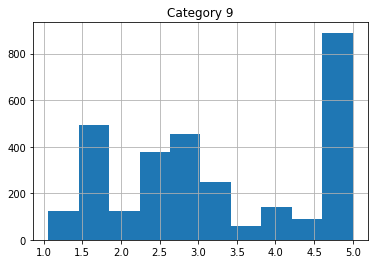

In [13]:
print(train_x.hist())
print(train_y.hist())

修正資料，將離群值以平均值取代。

In [14]:
df[df['Category 7']==5] = df['Category 7'].mean()
df[df['Category 8']==5]= df['Category 8'].mean()
df[df['Category 9']==5]= df['Category 9'].mean()
df[df['Category 10']==5]= df['Category 10'].mean()
df[df['Category 11']==5]= df['Category 11'].mean()

train_x = df[['Category 7','Category 8','Category 10','Category 11']][0:2000]
train_y = df[['Category 9']][0:2000]
test_x = df[['Category 7','Category 8','Category 10','Category 11']][2001:]
test_y = df[['Category 9']][2001:]

train_x.index = range(len(train_x))
train_y.index = range(len(train_y))
test_x.index = range(len(test_x))
test_y.index = range(len(test_y))

In [15]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()
train_x = stdscaler.fit_transform(train_x)
test_x = stdscaler.transform(test_x)

stdscaler = StandardScaler()
train_y = stdscaler.fit_transform(train_y)
test_y = stdscaler.transform(test_y)

### 執行修正後的結果

0.8396549968191657


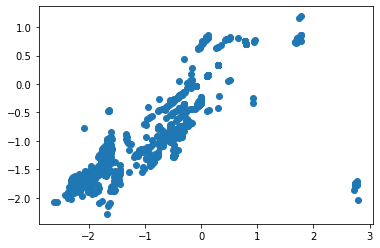

In [16]:
model = LinearRegression()
model.fit(train_x,train_y)

predict = model.predict(test_x)
print(r2_score(test_y,predict))

plt.scatter(test_y, predict)
plt.show()

r2_score得到顯著的提昇。

## 結論
* 可以得知餐廳的星數與購物廣場, 動物園, 酒吧以及當地觀光景點有關，也可以用這些景點的星數來預測使用者會給餐廳的評價。

## 計算執行時間


In [17]:
# 請勿更動此區塊程式碼

EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))

total execution time: 4.545103073120117
